# Exploração dos dados

In [32]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [33]:
plt.rcParams['figure.dpi'] = 250

In [34]:
month_number = {'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6, 'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12
}

In [35]:
df = pd.read_csv('cancellation_prediction.csv')

In [36]:
total_size = len(df)
total_size

119390

In [37]:
total_cancel = len(df.query('cancellation == 1'))
total_cancel

44224

In [38]:
len(df.query('cancellation == 0'))

75166

In [39]:
df['month_number'] = df['month_arrival_date'].apply(lambda x: month_number[x])

## Correlação das variáveis com `cancellation`

In [40]:
corr = df.corr()

<AxesSubplot:>

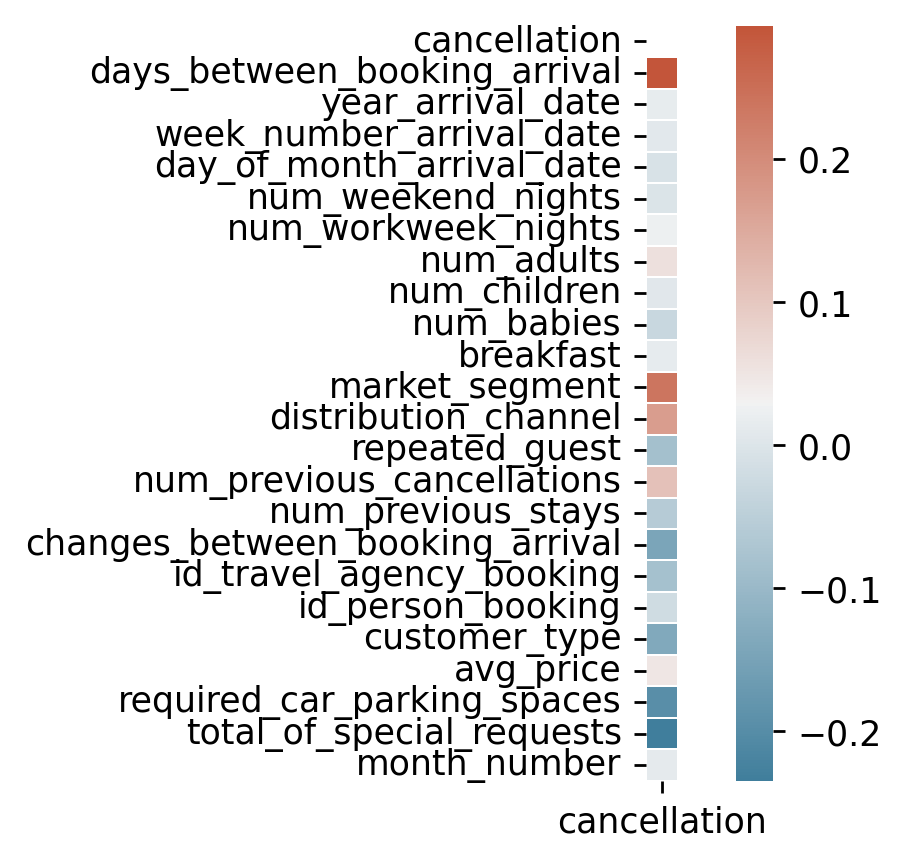

In [41]:
sns.heatmap(
    data=corr[['cancellation']],
    mask=np.triu(np.ones_like(corr[['cancellation']], dtype=bool)),
    cmap=sns.diverging_palette(230, 20, as_cmap=True, center='light'),
    square=True,
    linewidths=.5,
    xticklabels=True,
    yticklabels=True,
)

In [42]:
corr['cancellation'].sort_values(ascending=True)

total_of_special_requests         -0.234658
required_car_parking_spaces       -0.195498
changes_between_booking_arrival   -0.144381
customer_type                     -0.135819
repeated_guest                    -0.084793
id_travel_agency_booking          -0.083114
num_previous_stays                -0.057358
num_babies                        -0.032491
id_person_booking                 -0.020642
day_of_month_arrival_date         -0.006130
num_weekend_nights                -0.001791
num_children                       0.005048
week_number_arrival_date           0.008148
month_number                       0.011022
breakfast                          0.013124
year_arrival_date                  0.016660
num_workweek_nights                0.024765
avg_price                          0.049277
num_adults                         0.060017
num_previous_cancellations         0.110133
distribution_channel               0.169727
market_segment                     0.238335
days_between_booking_arrival    

- As variávies `total_of_special_requests`, `required_car_parking_spaces`, `changes_between_booking_arrival`, `customer_type`, `repeated_guest` parecem indicar que:
  - cliente que faz pedidos especiais durante a reserva tem menos chances de cancelar
  - um cliente anterior tem menos chanes de cancelar

- As variáveis `days_between_booking_arrival`, `market_segment`, `distribution_channel`, `num_previous_cancellations` parecem indicar que:
  - clientes de um certo seguimento têm maior chance de cancelar
  - clientes que cancelaram anteriormente têm mais chances de cancelar novamante
  - clientes que fazem reserva mais distantes têm mais chances de cancelar

## Explorando a variável `type`

In [43]:
df_type = df.groupby(['type', 'cancellation']).size().to_frame().rename(columns={0: 'count'})
df_type['percent_global'] = df_type['count'] / len(df)
df_type

count  percent_global
type        cancellation                       
Fancy Hotel 0             28938        0.242382
            1             11122        0.093157
Hotel       0             46228        0.387202
            1             33102        0.277259

In [44]:
# p(cancelation==1 | type==Hotel)
p_cancel_give_hotel = df_type['count']['Hotel'][1] / df_type['count']['Hotel'].sum()
p_cancel_give_hotel

0.41726963317786464

In [45]:
# p(cancelation==1 | type==Fancy Hotel)
p_cancel_give_fancyHotel = df_type['count']['Fancy Hotel'][1] / df_type['count']['Fancy Hotel'].sum()
p_cancel_give_fancyHotel

0.27763354967548676

- A change de existir cancelamento quando o `type` é `Fancy Hotel` é de 0.28, e 0.42 para `Hotel`

## Explorando a variável `year_arrival_date`

In [46]:
df_year = df.groupby(['year_arrival_date', 'cancellation']).size().to_frame().rename(columns={0: 'count'})
df_year['percent_global'] = df_year['count'] / len(df)
df_year

count  percent_global
year_arrival_date cancellation                       
2015              0             13854        0.116040
                  1              8142        0.068197
2016              0             36370        0.304632
                  1             20337        0.170341
2017              0             24942        0.208912
                  1             15745        0.131879

In [47]:
# p(cancelation==1 | year==2015)
df_year['count'][2015][1] / df_year['count'][2015].sum()

0.3701582105837425

In [48]:
# p(cancelation==1 | year==2016)
df_year['count'][2016][1] / df_year['count'][2016].sum()

0.3586329730015695

In [49]:
# p(cancelation==1 | year==2017)
df_year['count'][2017][1] / df_year['count'][2017].sum()

0.38697864182662767

- A chance de cancelamento manteve constante com os anos

## Explorando a variável `month_arrival_date`

In [50]:
df_month = df.groupby(['month_arrival_date', 'cancellation']).size().to_frame().rename(columns={0: 'count'})
df_month['percent_global'] = df_month['count'] / len(df)
df_month

count  percent_global
month_arrival_date cancellation                       
April              0              6565        0.054988
                   1              4524        0.037893
August             0              8638        0.072351
                   1              5239        0.043881
December           0              4409        0.036929
                   1              2371        0.019859
February           0              5372        0.044995
                   1              2696        0.022581
January            0              4122        0.034526
                   1              1807        0.015135
July               0              7919        0.066329
                   1              4742        0.039719
June               0              6404        0.053639
                   1              4535        0.037985
March              0              6645        0.055658
                   1              3149        0.026376
May                0              7114        0.059586
                   1              4677        0.039174
November           0              4672        0.039132
                   1              2122        0.017774
October            0              6914        0.057911
                   1              4246        0.035564
September          0              6392        0.053539
                   1              4116        0.034475

In [51]:
# p(cancelation==1 | month==January)
df_month['count']['January'][1] / df_month['count']['January'].sum()

0.3047731489289931

In [52]:
cancellation_by_month = []
for k,v in month_number.items():
    x = df_month['count'][k][1] / df_month['count'][k].sum()
    cancellation_by_month.append((k, v, x))

<AxesSubplot:xlabel='month', ylabel='cancellation %'>

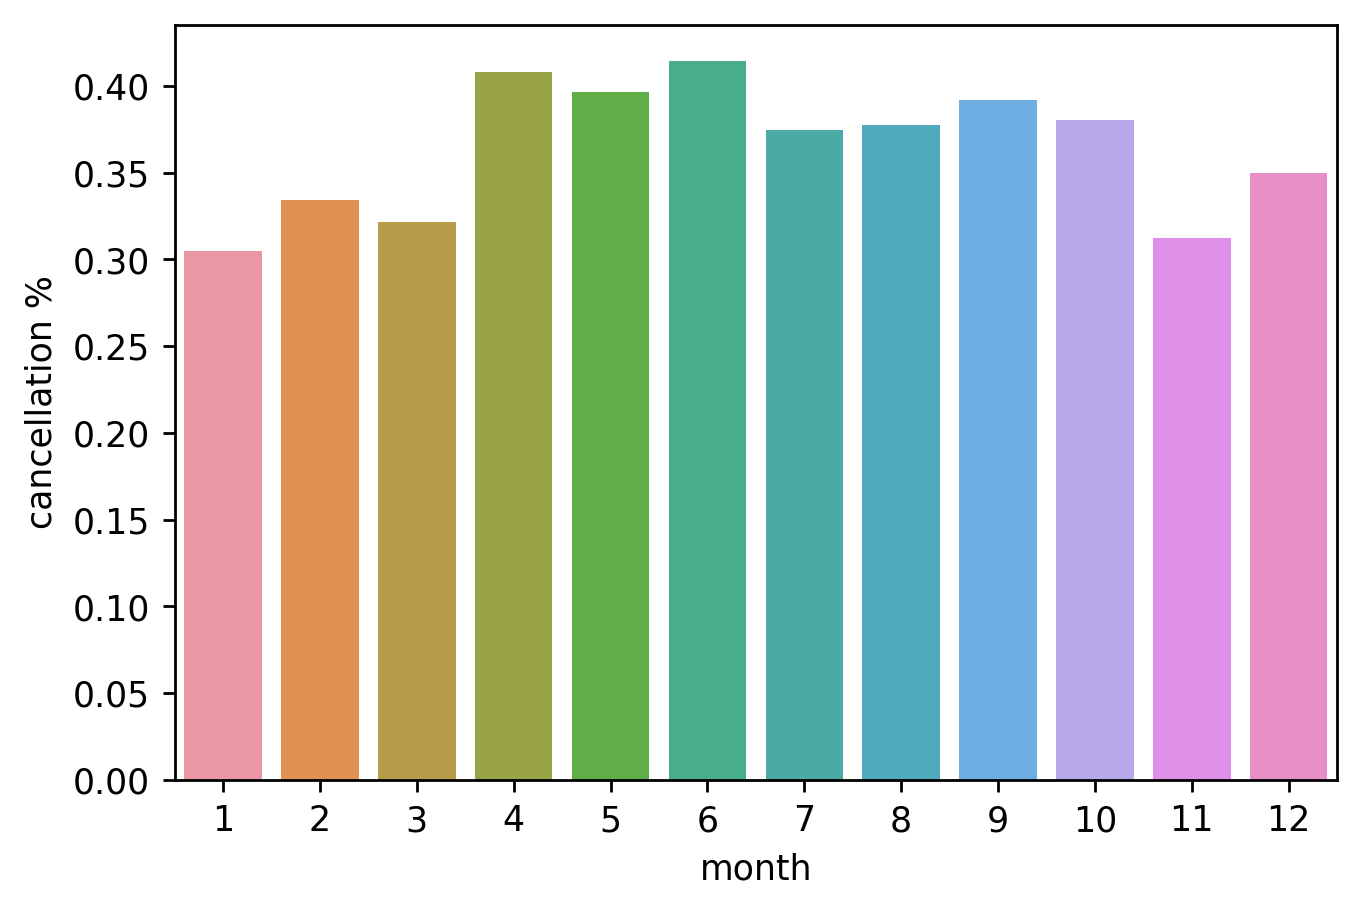

In [53]:
df_month2 = pd.DataFrame(np.array(cancellation_by_month), columns=('month_name', 'month', 'cancellation %'))
df_month2 = df_month2.astype({'cancellation %':float})
sns.barplot(data=df_month2, x='month', y='cancellation %')

- Os meses proximos ao começo/fim do ano aparentam apresentar menor chance de cancelamento, quando são considerados todos os anos

## Explorando as variáveis `month_arrival_date` e `year_arrival_date`

In [54]:
df_monthyear = df.groupby(['year_arrival_date', 'month_arrival_date', 'cancellation']).size().to_frame().rename(columns={0: 'count'})
df_monthyear['percent_global'] = df_monthyear['count'] / len(df)
df_monthyear

count  percent_global
year_arrival_date month_arrival_date cancellation                       
2015              August             0              2291        0.019189
                                     1              1598        0.013385
                  December           0              1947        0.016308
                                     1               973        0.008150
                  July               0              1517        0.012706
                                     1              1259        0.010545
                  November           0              1854        0.015529
                                     1               486        0.004071
                  October            0              3225        0.027012
                                     1              1732        0.014507
                  September          0              3020        0.025295
                                     1              2094        0.017539
2016              April              0              3367        0.028202
                                     1              2061        0.017263
                  August             0              3238        0.027121
                                     1              1825        0.015286
                  December           0              2462        0.020621
                                     1              1398        0.011710
                  February           0              2554        0.021392
                                     1              1337        0.011199
                  January            0              1691        0.014164
                                     1               557        0.004665
                  July               0              3073        0.025739
                                     1              1499        0.012555
                  June               0              3196        0.026769
                                     1              2096        0.017556
                  March              0              3347        0.028034
                                     1              1477        0.012371
                  May                0              3563        0.029843
                                     1              1915        0.016040
                  November           0              2818        0.023603
                                     1              1636        0.013703
                  October            0              3689        0.030899
                                     1              2514        0.021057
                  September          0              3372        0.028244
                                     1              2022        0.016936
2017              April              0              3198        0.026786
                                     1              2463        0.020630
                  August             0              3109        0.026041
                                     1              1816        0.015211
                  February           0              2818        0.023603
                                     1              1359        0.011383
                  January            0              2431        0.020362
                                     1              1250        0.010470
                  July               0              3329        0.027883
                                     1              1984        0.016618
                  June               0              3208        0.026870
                                     1              2439        0.020429
                  March              0              3298        0.027624
                                     1              1672        0.014005
                  May                0              3551        0.029743
                                     1              2762        0.023134

In [55]:
# p(cancelation==1 | month==January and year==2016)
df_monthyear['count'][2016]['January'][1] / df_monthyear['count'][2016]['January'].sum()

0.24777580071174377

In [56]:
cancellation_by_monthyear = []
for y in [2017, 2016, 2015]:
    for k,v in month_number.items():
        try:
            x = df_monthyear['count'][y][k][1] / df_monthyear['count'][y][k].sum()
            cancellation_by_monthyear.append((y, k, v, x))
        except:
            pass

<AxesSubplot:xlabel='2', ylabel='3'>

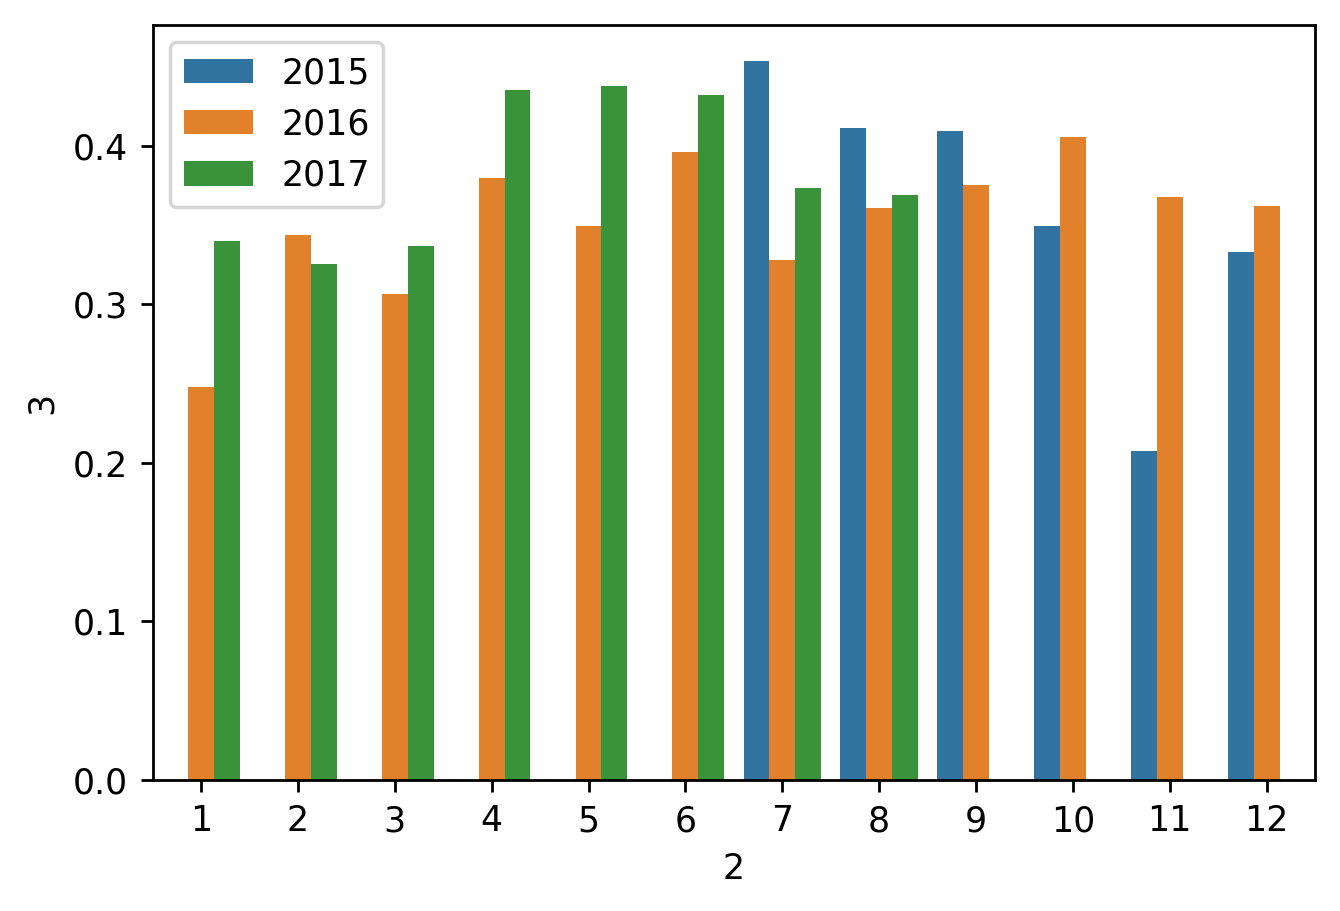

In [57]:
sns.barplot(data=pd.DataFrame(cancellation_by_monthyear), x=2, y=3, hue=0)

- O chance de cancelamento parece ser maior no meio do ano de forma consistente
- 2017 apresenta porcentagem de cancelamento maior que 2016 em quase todos os meses, talvez devido a um aumento de clientes
- A variação parece ser consiste mês a mês, com alguns anos com valores mais altos que outros

- Uma floresta de decisão poderia aprender outras informações mais relavantes, mas com o risco de overfitting caso os hiper-parâmetros não sejam ajustados